# Movement timing analysis

## Context
To train our model, we feed it with time windows labelled with 'movement' or 'no movement'. In the labelling_data notebook, we explained how our labelling works, assigning the label 'movement' on the onset of the movement using a threshold on the norm of the acceleration. However this label is assgned to a point in time, and we need to assign it to a time window. \
To get windows labeled 'movement', we epoch the signal on the onset of the movement. We then need to assign the label 'movement' to the whole window. To get windows labeled 'no movement', the idea is to use the epoch method with negativ value from the onset of the movement. However, we need to make sure that the window does not contain any movement.

## Goal
The aim of this notebook is to analyse the timing of the movement to determine the best parameters for the epoching method.

In [2]:
from preprocessing import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import mne
import os

In [3]:
FOLDER_PATH = './../../data/raw/Data_npy/'
FILE_PATH_LIST = [FOLDER_PATH + file_path for file_path in os.listdir(FOLDER_PATH) if file_path.endswith('.npy')]

In [4]:
# min time between two events
def get_min_time_between_two_events(raws):
        # Trouver les indices où le mouvement commence
    indices = [i for i, x in enumerate(raws['movement'][0][0]) if x >= 1]

    # Calculer la différence entre les indices consécutifs
    differences = [indices[i+1] - indices[i] for i in range(len(indices) - 1)]
    min_diff = min(differences)
    min_diff_time = min_diff / 1024
    return min_diff_time

In [5]:
min_diff_time_left_list = []
min_diff_time_right_list = []
for file in FILE_PATH_LIST:
    data_loader = DataLoader(file)
    raws_left = data_loader.get_raws(side='G')
    raws_right = data_loader.get_raws(side='D')
    min_diff_time_left = get_min_time_between_two_events(raws_left) if raws_left is not None else None
    min_diff_time_right = get_min_time_between_two_events(raws_right) if raws_right is not None else None
    min_diff_time_left_list.append(min_diff_time_left)
    min_diff_time_right_list.append(min_diff_time_right)
    print(f'file: {file}')
    print(f'min_diff_time_left: {min_diff_time_left}')
    print(f'min_diff_time_right: {min_diff_time_right}')

file: ./../../data/raw/Data_npy/DATA_001_Trial1.npy
min_diff_time_left: 10.263671875
min_diff_time_right: 10.0400390625
file: ./../../data/raw/Data_npy/DATA_001_Trial2.npy
min_diff_time_left: 10.087890625
min_diff_time_right: 10.1591796875
file: ./../../data/raw/Data_npy/DATA_002_Trial1.npy
min_diff_time_left: 10.255859375
min_diff_time_right: 10.6796875
file: ./../../data/raw/Data_npy/DATA_002_Trial2.npy
min_diff_time_left: 10.3369140625
min_diff_time_right: 10.8720703125
file: ./../../data/raw/Data_npy/DATA_002_Trial3.npy
min_diff_time_left: None
min_diff_time_right: 12.6318359375
file: ./../../data/raw/Data_npy/DATA_003_Trial1.npy
min_diff_time_left: 6.7763671875
min_diff_time_right: 10.607421875
file: ./../../data/raw/Data_npy/DATA_003_Trial2.npy
min_diff_time_left: 10.16015625
min_diff_time_right: 10.1845703125
file: ./../../data/raw/Data_npy/DATA_004_Trial1.npy
min_diff_time_left: 10.240234375
min_diff_time_right: 10.1123046875
file: ./../../data/raw/Data_npy/DATA_004_Trial2.npy


In [6]:
min_diff_time_left_list_new = [x if x is not None else 10 for x in min_diff_time_left_list]
min_diff_time_right_list_new = [x if x is not None else 10 for x in min_diff_time_right_list]

In [7]:
min_diff_time_left = min(min_diff_time_left_list_new)
min_diff_time_right = min(min_diff_time_right_list_new)

print(f'min_diff_time_left: {min_diff_time_left}')
print(f'min_diff_time_right: {min_diff_time_right}')

min_diff_time_left: 5.927734375
min_diff_time_right: 5.3837890625


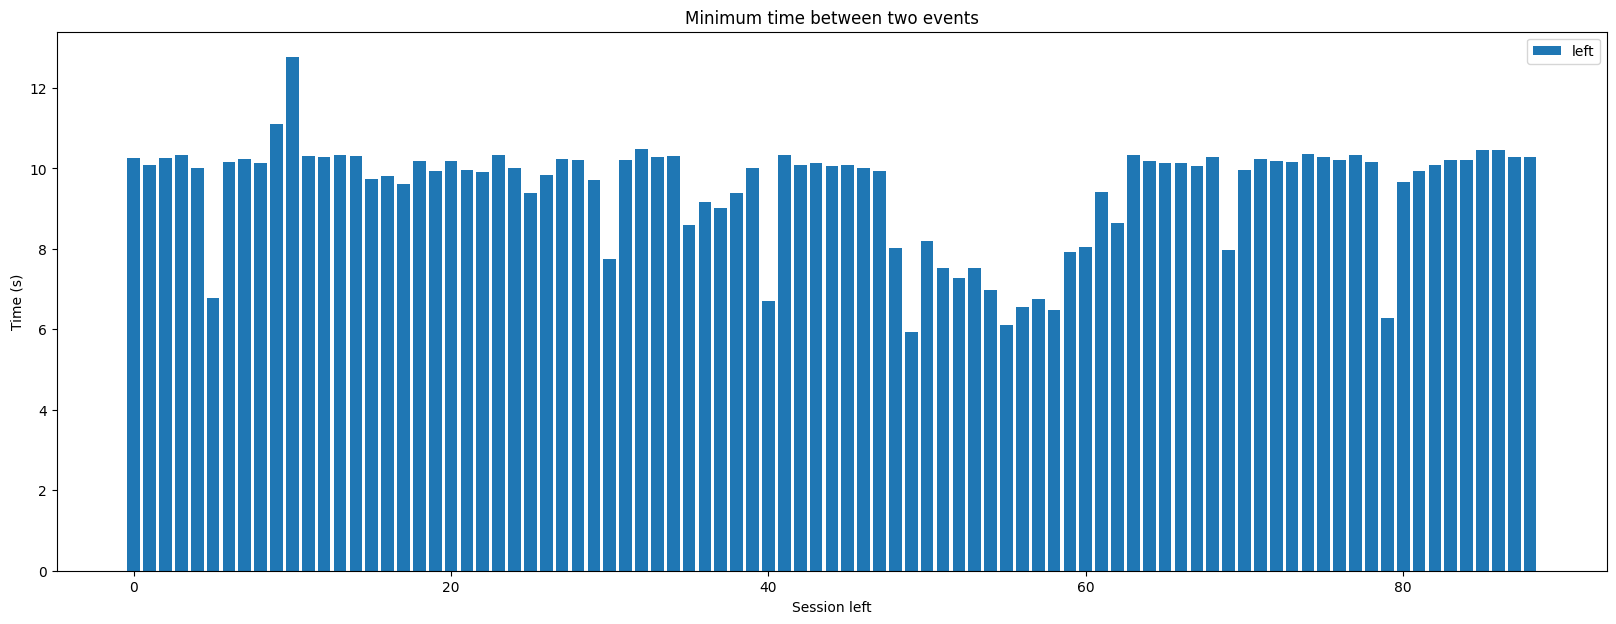

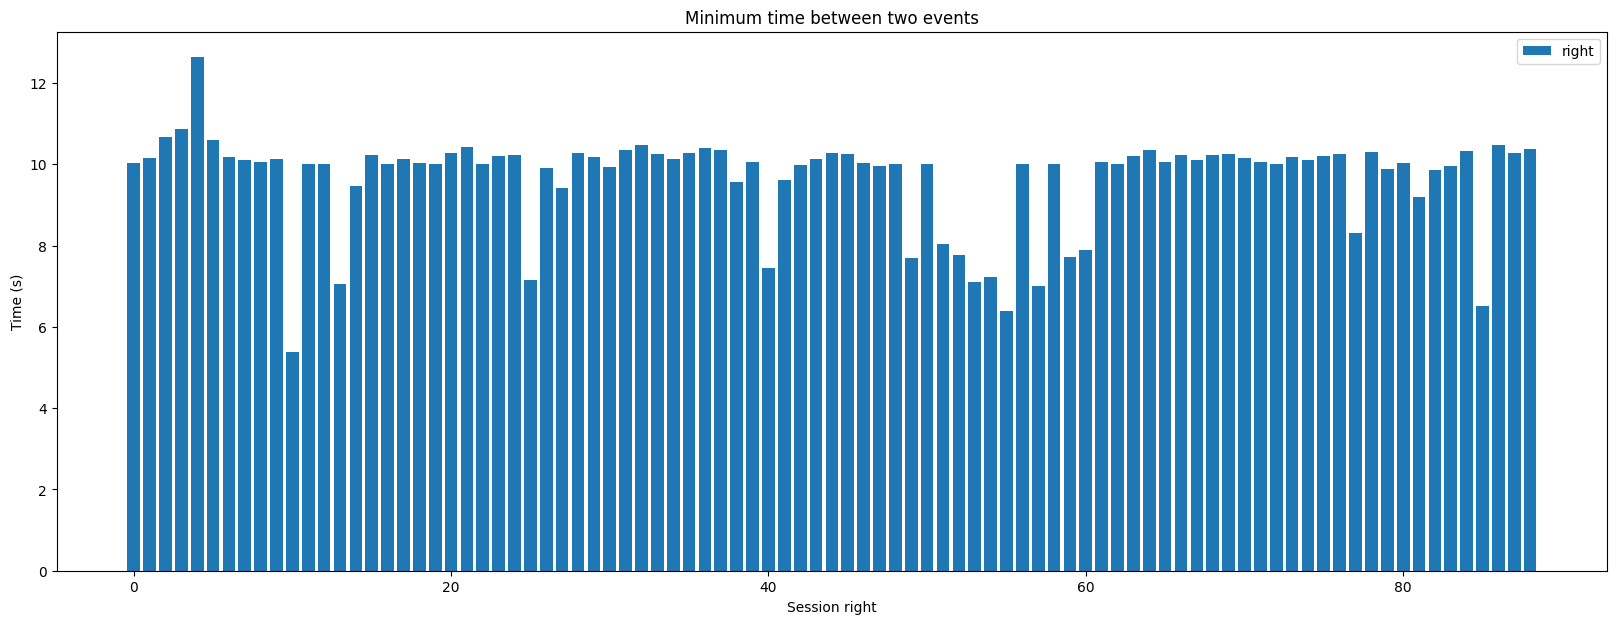

In [8]:
plt.figure(figsize=(20, 7))
plt.bar(range(len(min_diff_time_left_list_new)), min_diff_time_left_list_new, label='left')
plt.title('Minimum time between two events')
plt.xlabel('Session left')
plt.ylabel('Time (s)')
plt.legend()
plt.show()

plt.figure(figsize=(20, 7))
plt.bar(range(len(min_diff_time_right_list_new)), min_diff_time_right_list_new, label='right')
plt.title('Minimum time between two events')
plt.xlabel('Session right')
plt.ylabel('Time (s)')
plt.legend()
plt.show()